In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_validate
from sklearn.metrics import classification_report,make_scorer,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import os

random_state = 23873


outdir = r'./eval/'
if not os.path.exists(outdir):
    os.mkdir(outdir)
    
outdir = r'./eval/Wrappers'
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [2]:
dt = pd.read_csv(r'data/refined_data.csv')

### RFE

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

features = dt.copy()
target = features.pop('Label')
X_norm = MinMaxScaler().fit_transform(features)

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1000, verbose=5)
rfe_selector.fit(X_norm, target)

Fitting estimator with 20531 features.
Fitting estimator with 19531 features.
Fitting estimator with 18531 features.
Fitting estimator with 17531 features.
Fitting estimator with 16531 features.
Fitting estimator with 15531 features.
Fitting estimator with 14531 features.
Fitting estimator with 13531 features.
Fitting estimator with 12531 features.
Fitting estimator with 11531 features.
Fitting estimator with 10531 features.
Fitting estimator with 9531 features.
Fitting estimator with 8531 features.
Fitting estimator with 7531 features.
Fitting estimator with 6531 features.
Fitting estimator with 5531 features.
Fitting estimator with 4531 features.
Fitting estimator with 3531 features.
Fitting estimator with 2531 features.
Fitting estimator with 1531 features.
Fitting estimator with 531 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1000,
    verbose=5)

In [4]:
rfe_support = rfe_selector.get_support()
rfe_feature = features.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
selected_cols = rfe_feature

10 selected features


In [5]:
from lazypredict.Supervised import LazyClassifier
features = dt[selected_cols + ['Label']].copy()
target = features.pop('Label')
x_train, x_test, y_train, y_test = train_test_split(MinMaxScaler().fit_transform(features), target,stratify=target, test_size=0.3,random_state=random_state)
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models_rfe,predictions=clf.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 50.93it/s]


In [6]:
models_rfe

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.95,0.96,0.96,0.95,0.01
LogisticRegression,0.92,0.94,0.94,0.93,0.01
ExtraTreesClassifier,0.92,0.92,0.92,0.92,0.09
LinearDiscriminantAnalysis,0.92,0.92,0.92,0.92,0.01
RidgeClassifier,0.92,0.92,0.92,0.92,0.01
PassiveAggressiveClassifier,0.92,0.92,0.92,0.92,0.01
Perceptron,0.92,0.92,0.92,0.92,0.01
RidgeClassifierCV,0.92,0.92,0.92,0.92,0.01
SGDClassifier,0.92,0.92,0.92,0.92,0.01


In [7]:
models_rfe.to_csv(os.path.join(outdir, 'model_eval_rfe.csv'))

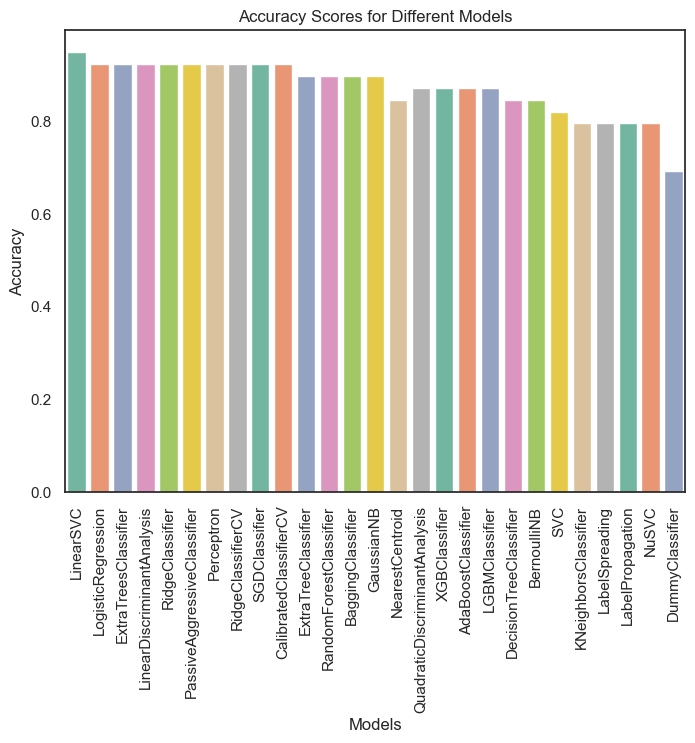

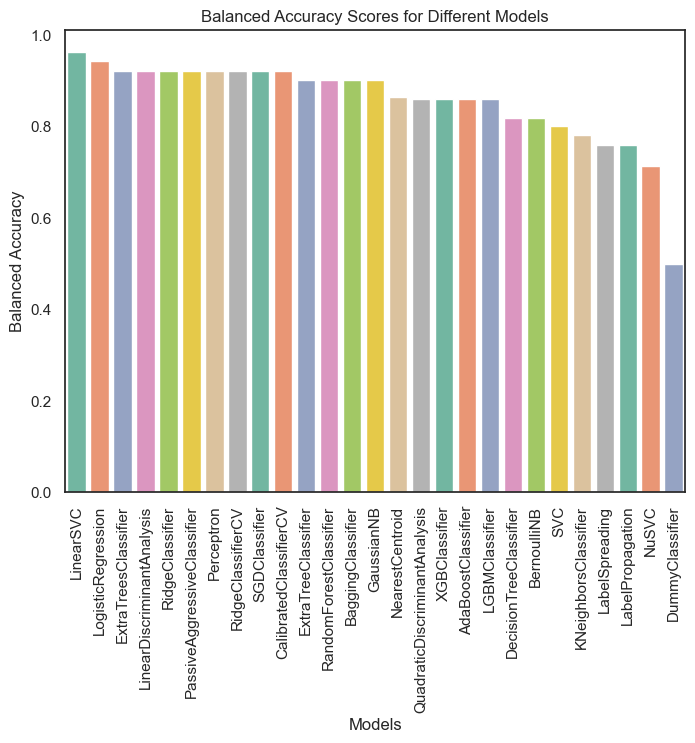

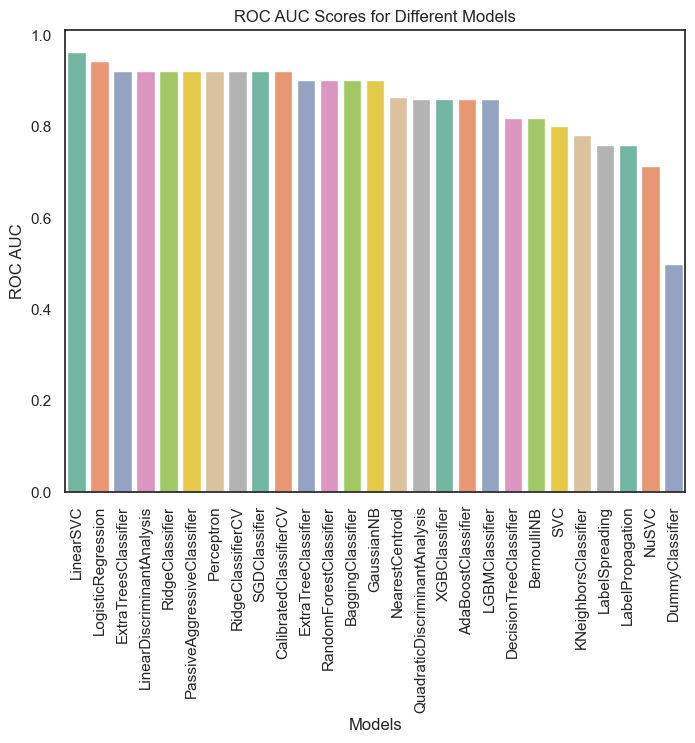

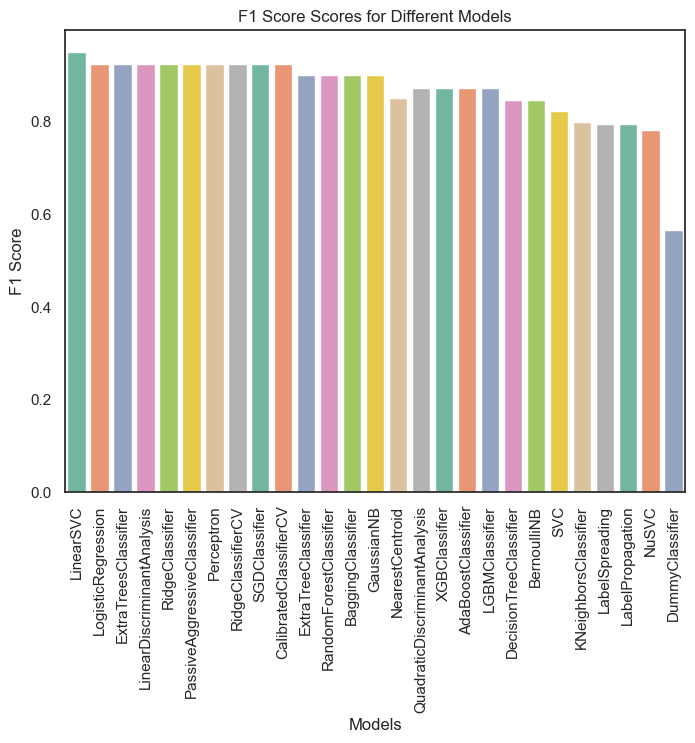

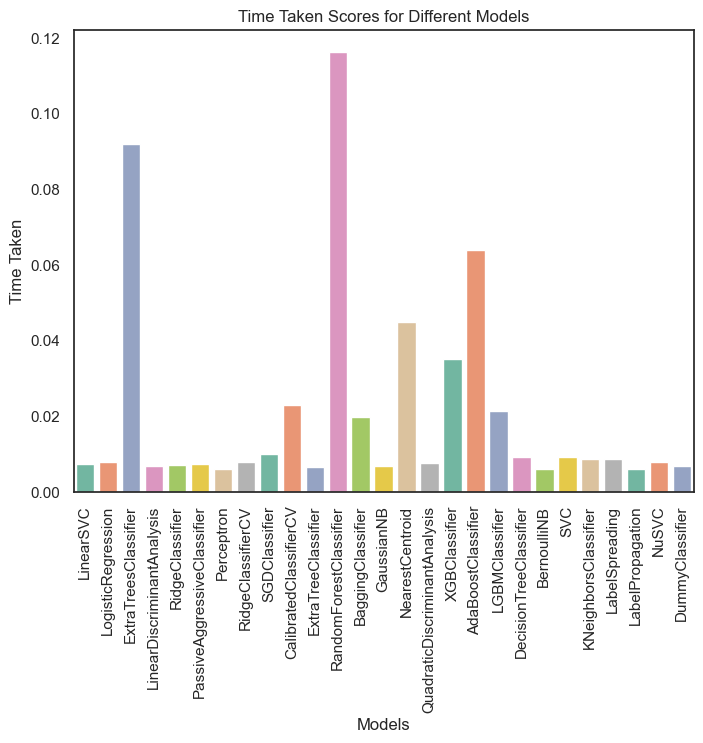

In [8]:
for x in models_rfe.columns:
    plt.figure(figsize=(8, 6))
    sns.set(style="white")
    sns.barplot(x=models_rfe.index, y=x, data=models_rfe,  palette="Set2")
    plt.title(f'{x} Scores for Different Models')
    plt.xticks(rotation=90)
    plt.xlabel('Models')
    plt.ylabel(x)
    plt.savefig(os.path.join(outdir, f'RFE_Results_based_on_{x}.png'), dpi=300, bbox_inches='tight')
    plt.show()

In [9]:
with open(os.path.join(outdir,'selected features_rfe.txt'), 'w') as file:
    file.writelines('\n'.join(selected_cols))

In [10]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_validate
from sklearn.metrics import classification_report,make_scorer,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier



import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,make_scorer,confusion_matrix


random_state = 23873

def tss(y_true,y_pred,**kwargs):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    p = tp + fn 
    n = fp + tn
    tss = (tp/p) - (fp/n)
    return tss

# tss([0, 1, 0, 1], [1, 1, 1, 0])
tss_scorer = make_scorer(tss,greater_is_better=True)

#### hss2

def hss2(y_true,y_pred,**kwargs):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    p = tp + fn 
    n = fp + tn
    hss2 = (2 * ((tp*tn) - (fn*fp))) / (p*(fn+tn) + n*(tp+fp))
    return hss2

# hss2([0, 1, 0, 1], [1, 1, 1, 0])
hss2_scorer = make_scorer(hss2,greater_is_better=True)

def modelling_mulitple(x_train, y_train,folder=''):

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    accuracy_means,accuracy_std,precision_means,precision_std,recall_means,recall_std,f1_means,f1_std,tss_mean,tss_std,hss2_mean,hss2_std = [],[],[],[],[],[],[],[],[],[],[],[]

    classifiers = [LogisticRegression(random_state=random_state),DecisionTreeClassifier(random_state=random_state),
                  SVC(random_state=random_state),GaussianNB(),AdaBoostClassifier(random_state=random_state),
                    RandomForestClassifier(n_estimators=20,random_state=random_state),XGBClassifier()
                  ]

    scoring = {'accuracy': 'accuracy',
               'precision_macro': 'precision_macro',
               'recall_macro': 'recall_macro',
               'f1_macro': 'f1_macro',
               'tss': tss_scorer,
               'hss2': hss2_scorer}

    for classifier in classifiers:
        print(classifier)
        scores = cross_validate(classifier, x_train, y_train, scoring=scoring, cv=cv)
        accuracy_means.append(scores['test_accuracy'].mean())
        precision_means.append(scores['test_precision_macro'].mean())
        precision_std.append(scores['test_precision_macro'].std())
        recall_means.append(scores['test_recall_macro'].mean())
        recall_std.append(scores['test_recall_macro'].std())
        f1_means.append(scores['test_f1_macro'].mean())
        f1_std.append(scores['test_f1_macro'].std())
        tss_mean.append(scores['test_tss'].mean())
        tss_std.append(scores['test_tss'].std())
        hss2_mean.append(scores['test_hss2'].mean())
        hss2_std.append(scores['test_hss2'].std())

    cv_res = pd.DataFrame(data={'Algorithms':['LogisticRegression','DecisionTree','SVM','Naive Bayes','AdaBoost',
                                              'RandomForest','XGBoost'],'Accuracy Mean Score':accuracy_means,
                                                'Precision Mean Score':precision_means, 'Precision std':precision_std,
                                                'Recall Mean Score':recall_means, 'Recall std':recall_std,'F1 Mean Score':f1_means, 'F1 std':f1_std,
                                                'TSS Mean Score':tss_mean, 'TSS std':tss_std, 'HSS2 Mean Score':hss2_mean, 'HSS2 std':hss2_std
                               })

    f, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    

    sns.barplot(x = 'Accuracy Mean Score',y = 'Algorithms',data = cv_res, palette = "Set2",ax=axes[0]).set(title='Cross Validation Scores')
    sns.barplot(x = 'Precision Mean Score',y = 'Algorithms',data = cv_res, palette = "Set2",ax=axes[1]).set(title='Cross Validation Scores')
    sns.barplot(x = 'Recall Mean Score',y = 'Algorithms',data = cv_res, palette = "Set2",ax=axes[2]).set(title='Cross Validation Scores')
    sns.barplot(x = 'F1 Mean Score',y = 'Algorithms',data = cv_res, palette = "Set2",ax=axes[3]).set(title='Cross Validation Scores')
    sns.barplot(x = 'TSS Mean Score',y = 'Algorithms',data = cv_res, palette = "Set2",ax=axes[4]).set(title='Cross Validation Scores')
    sns.barplot(x = 'HSS2 Mean Score',y = 'Algorithms',data = cv_res, palette = "Set2",ax=axes[5]).set(title='Cross Validation Scores')

    accc = ['Accuracy Mean Score', 'Precision Mean Score', 'Recall Mean Score', 'F1 Mean Score', 'TSS Mean Score', 'HSS2 Mean Score']

    for i, acc in enumerate(accc):
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=acc, y='Algorithms', data=cv_res, palette="Set2", ax=ax).set(title='Cross Validation Scores')

        # Adjust the spacing between subplots
        plt.tight_layout()

        # Save each figure with a different name
        fig.savefig(os.path.join(outdir, f'{acc}_{folder}.png'), dpi=300, bbox_inches='tight')
        plt.close(fig)  # Close the figure
    
    return cv_res.sort_values(by='Accuracy Mean Score', ascending=False)

LogisticRegression(random_state=23873)
DecisionTreeClassifier(random_state=23873)
SVC(random_state=23873)
GaussianNB()
AdaBoostClassifier(random_state=23873)
RandomForestClassifier(n_estimators=20, random_state=23873)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


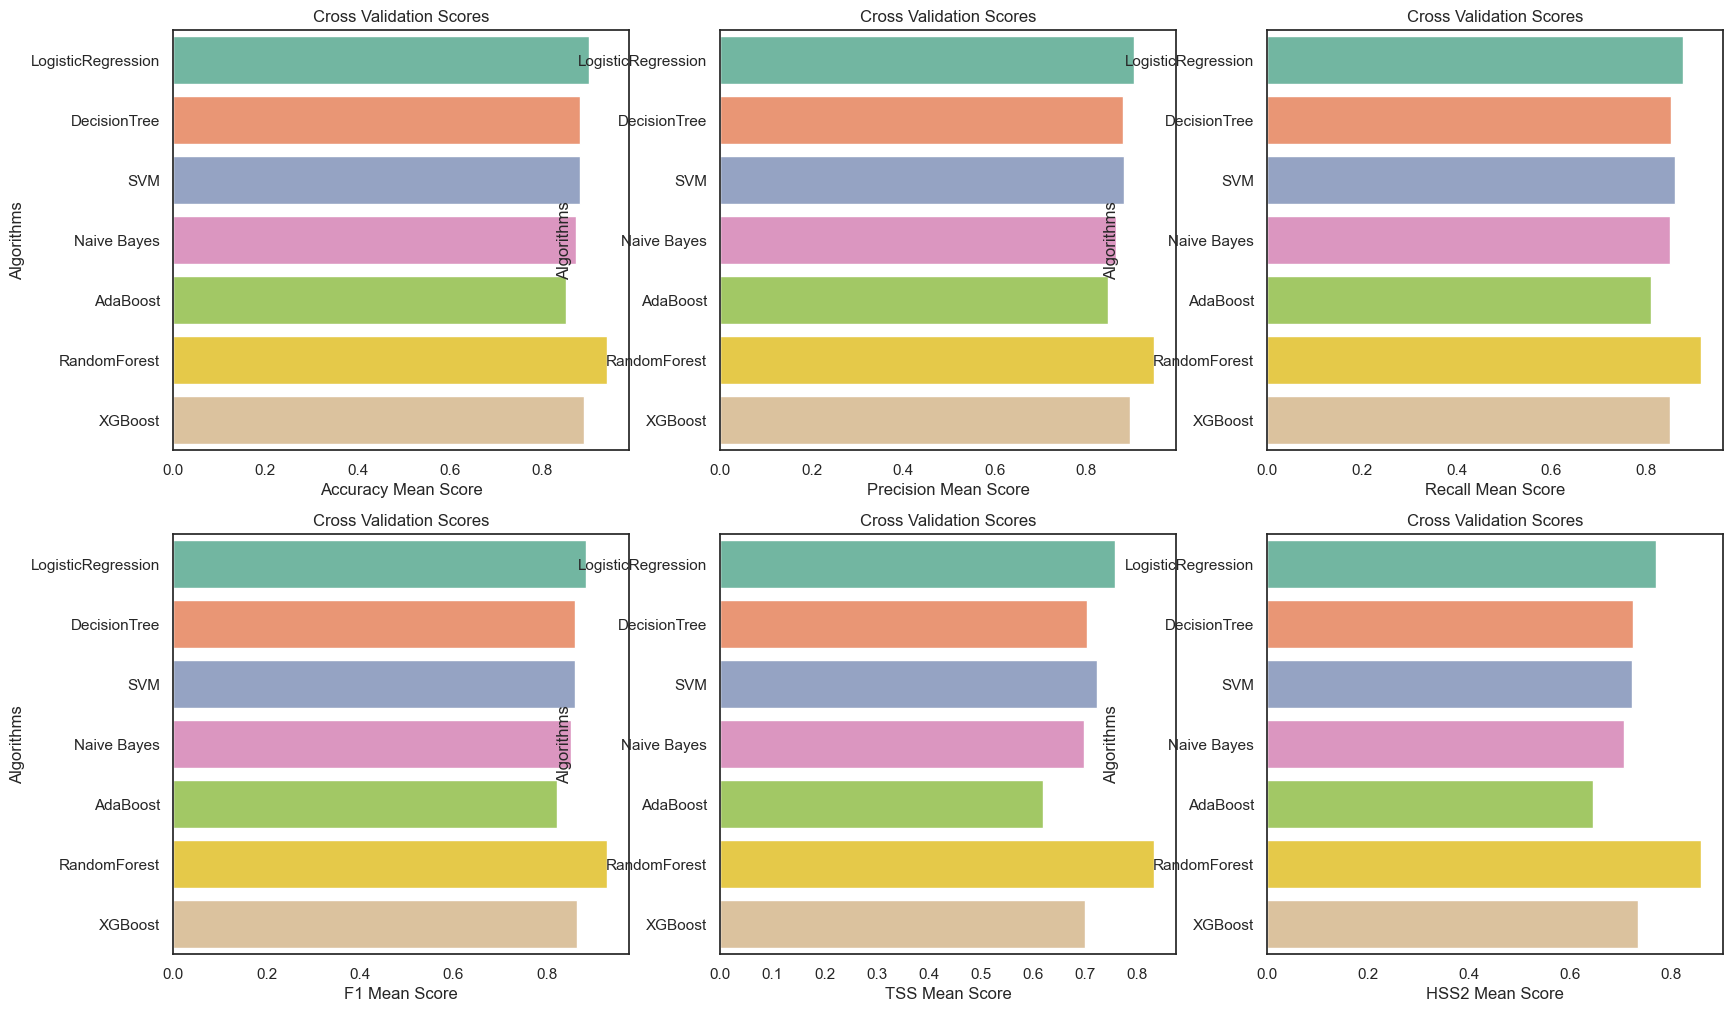

In [11]:
features = dt[selected_cols + ['Label']].copy()
target = features.pop('Label')
features = StandardScaler().fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(features, target,stratify=target, test_size=0.2)

modelling_mulitple(x_train, y_train, 'rfe_manual').to_csv(os.path.join(outdir, 'model_eval_manual_rfe.csv'), index=False)